<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [37]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [38]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [39]:
## Write your code here

missing_data_employment=df["Employment"].isnull().sum()
missing_data_JobSat=df["JobSat"].isnull().sum()
missing_data_RemoteWork=df["RemoteWork"].isnull().sum()

print('missing_data_employment:', missing_data_employment)
print('missing_data_JobSat:', missing_data_JobSat)
print('missing_data_RemoteWork:', missing_data_RemoteWork)

#fill missing data in jobsat column, based on median.
#first see examples of jobsat column. if this is a numeric score we can use median as a filler.

df['JobSat'].value_counts()

#work out median

median_JobSat=df['JobSat'].astype("float").median()

df['JobSat'].replace(np.nan, median_JobSat, inplace=True)

#check there are no more missing data in JobSat


new_missing_data_JobSat=df["JobSat"].isnull().sum()
print('new_missing_data_JobSat:', new_missing_data_JobSat)



missing_data_employment: 0
missing_data_JobSat: 36311
missing_data_RemoteWork: 10631
new_missing_data_JobSat: 0


/tmp/ipykernel_307/3320775145.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].replace(np.nan, median_JobSat, inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [40]:
## new function
def categorize_experience_level(years):
    if years<=5:
        return '0-5 Years'
    elif 6<= years <=10:
        return '5-10 Years'
    elif 11<= years <=20:
        return '10-20 Years'
    else:
        return '>20'

## remove rows with nan values
df.dropna(subset=['YearsCodePro'], axis=0, inplace=True)

# change 'less than 1 year' to '0', 'more than 50 years' to '55'

df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '55'
}, inplace=True)


## make sure data in YearsCodePro is all one type (int)
df[['YearsCodePro']] = df[['YearsCodePro']].astype('int')

## apply function to YearsCodePro column

df['ExperienceRange']=df['YearsCodePro'].apply(categorize_experience_level)

## print the updated dataframe

df['ExperienceRange'].head()

# Step 2: Calculate the median job satisfaction for each experience range
median_job_sat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Step 3: Print out the median job satisfaction scores by experience range
print("Median Job Satisfaction by Experience Range:")
print(median_job_sat_by_experience)

# Seems odd that every range would have a JobSat score of 7. But this is the median too. But 29497 responses are '7' so this probably makes sense with the data

Median Job Satisfaction by Experience Range:
  ExperienceRange  JobSat
0       0-5 Years     7.0
1     10-20 Years     7.0
2      5-10 Years     7.0
3             >20     7.0


/tmp/ipykernel_307/1528593108.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace({


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


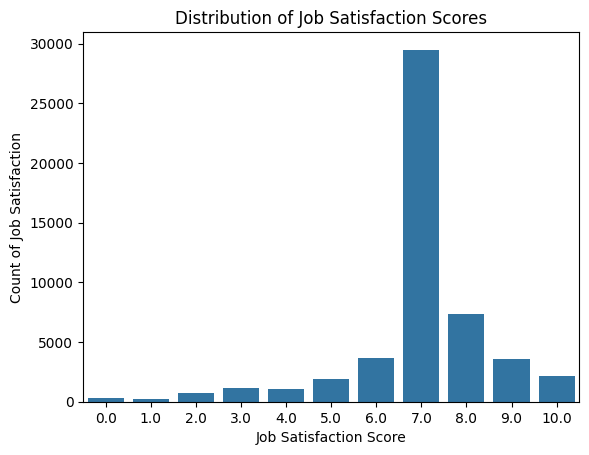

In [41]:
## Write your code here

df_JobSat=df['JobSat'].value_counts().reset_index()

plt.figure()

sns.barplot(data=df_JobSat, x='JobSat', y='count')

plt.ylabel ('Count of Job Satisfaction')
plt.xlabel ('Job Satisfaction Score')
plt.title ('Distribution of Job Satisfaction Scores')

plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


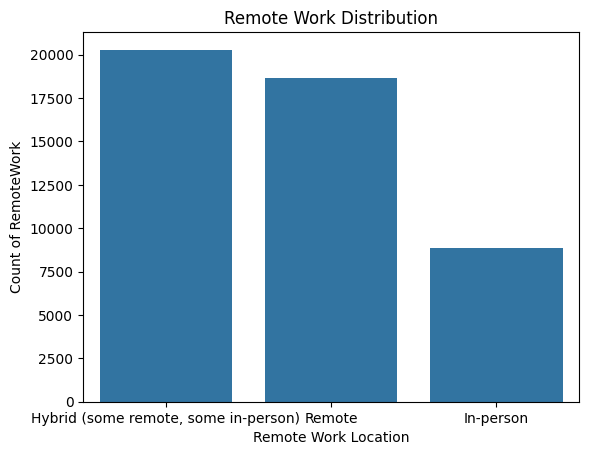

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15493   
Employed, full-time;Employed, part-time                                               74   
Employed, full-time;Independent contractor, fre...                                  1182   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Student, part-time;Employed,...                              

In [42]:
## Write your code here
## Count plot for remote work distribution

df_RemoteWork=df['RemoteWork'].value_counts().reset_index()

plt.figure()

sns.barplot(data=df_RemoteWork, x='RemoteWork', y='count')

plt.ylabel ('Count of RemoteWork')
plt.xlabel ('Remote Work Location')
plt.title ('Remote Work Distribution')

plt.show()

## Cross-tabulate remote work preferences by employment type

# Cross-tabulate remote work preferences by employment type
crosstab_result = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)

# Print the cross-tabulation result
print(crosstab_result)



#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


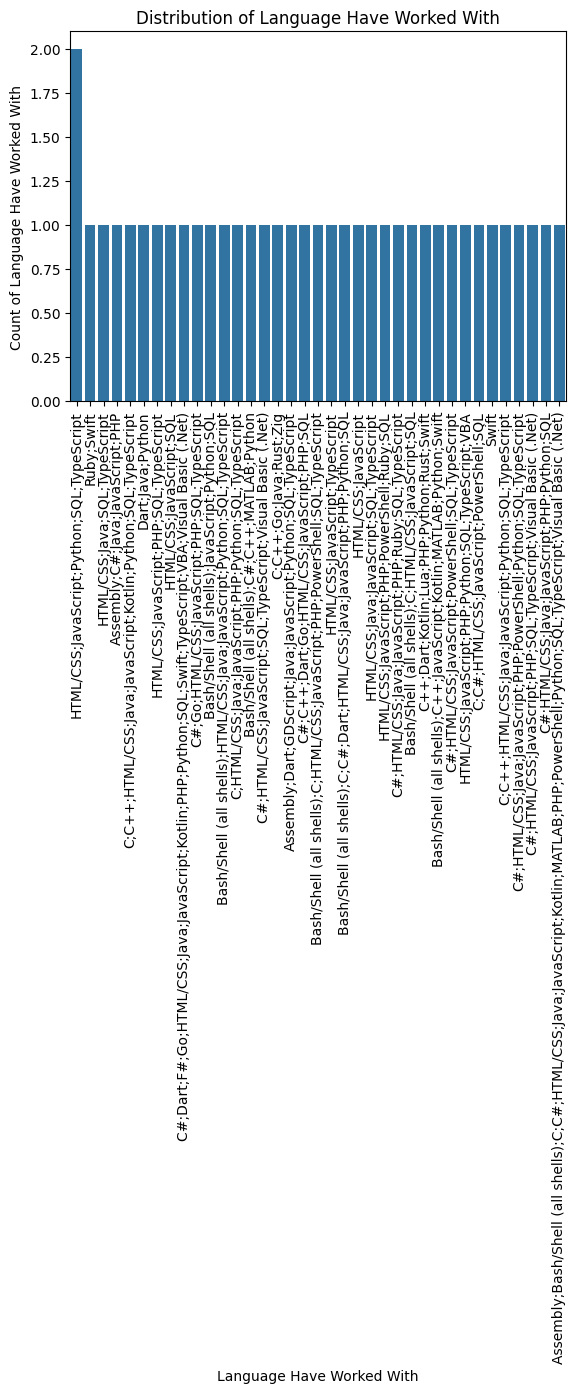

In [55]:
## Write your code here

## Example country is Lebanon (38 data entries)

## Filter data by country = Lebanon

df_Lebanon = df[df['Country'] == 'Lebanon']


df_LanguageHaveWorkedWith=df_Lebanon['LanguageHaveWorkedWith'].value_counts().reset_index()

plt.figure()

sns.barplot(data=df_LanguageHaveWorkedWith, x='LanguageHaveWorkedWith', y='count')

plt.ylabel ('Count of Language Have Worked With')
plt.xlabel ('Language Have Worked With')
plt.title ('Distribution of Language Have Worked With')

plt.xticks(rotation=90)

plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


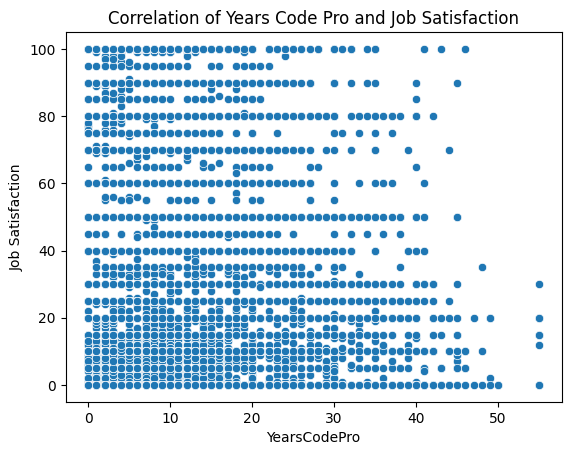

In [44]:
## Write your code here

df_YearsCodePro_JobSatPoints1 = df[['YearsCodePro', 'JobSatPoints_1']]

plt.figure()
sns.scatterplot(data=df_YearsCodePro_JobSatPoints1, x='YearsCodePro', y='JobSatPoints_1')
plt.ylabel('Job Satisfaction')
plt.xlabel('YearsCodePro')
plt.title('Correlation of Years Code Pro and Job Satisfaction')
plt.show()
            

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


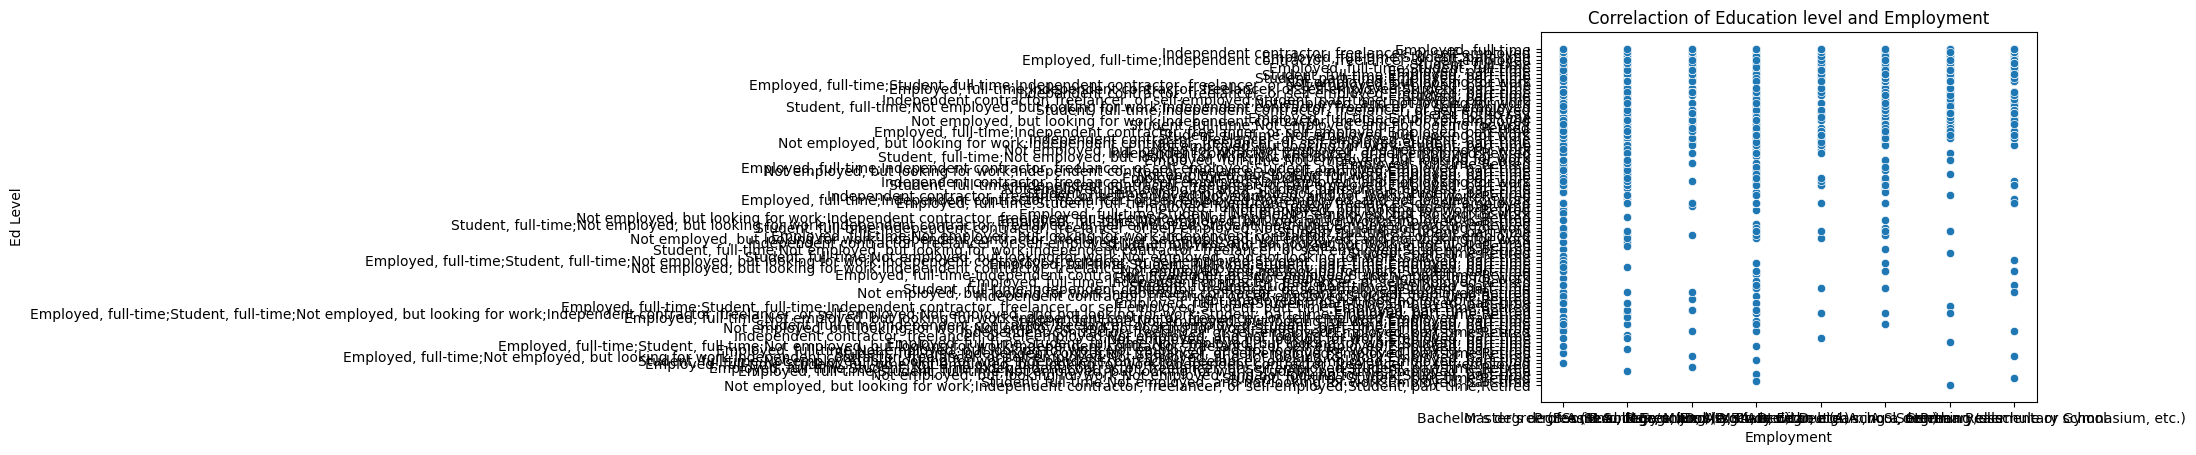

In [57]:
## Write your code here

df_EdLevel_Employment = df[['EdLevel', 'Employment']]

plt.figure()
sns.scatterplot(data=df_EdLevel_Employment, x='EdLevel', y='Employment')
plt.ylabel('Ed Level')
plt.xlabel('Employment')
plt.title('Correlaction of Education level and Employment')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [56]:
## Write your code here

# Save the modified dataset to a CSV file
df.to_csv('Updated_dataset', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
